In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from numpy import nan 

from pyproj import Proj, Transformer
import geopandas as gp
from shapely.geometry import Point


# Create a grid of (lat,lon) points covering more than California area

In [2]:
n_lat = 100
n_lon = 100

lat_min = 32.32258176309383
lat_max = 42.0800848569942
lon_min = -124.687572099472
lon_max = -113.9228661436105

lats = np.linspace(lat_min,lat_max,n_lat)
lons = np.linspace(lon_min,lon_max,n_lon)

Lat_mesh,Lon_mesh = np.meshgrid(lats,lons)


LAT_LON = np.array(list(zip(Lat_mesh.ravel(), Lon_mesh.ravel()))).T

LAT = LAT_LON[0,:]
LON = LAT_LON[1,:]

# Initial plot

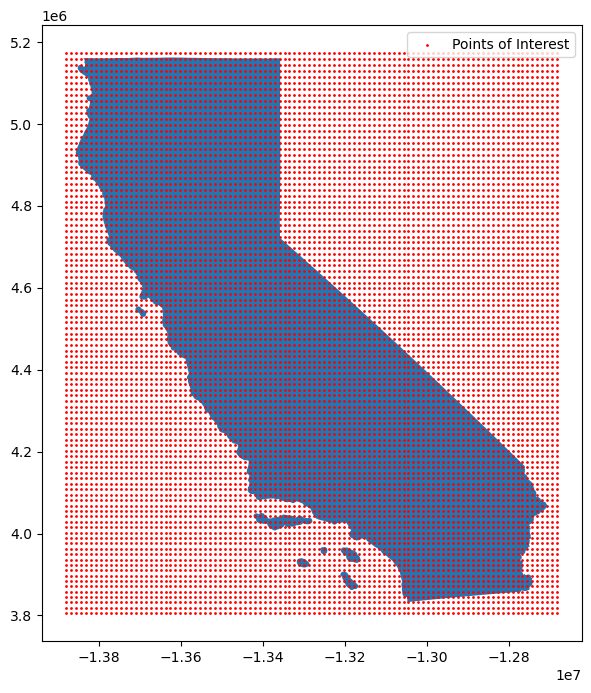

In [3]:
# Define the source and target EPSG codes
source_epsg = 'epsg:4326'  # WGS84
target_epsg = 'epsg:3857'  # Web Mercator

# Create Transformer
transformer = Transformer.from_crs(source_epsg, target_epsg)

# Transform the coordinates
target_x, target_y = transformer.transform(LAT, LON)


#shapfile_path = 'californiaCA_State_TIGER2016.shp'
shapefile_path = 
gdf = gp.read_file(shapfile_path)


fig, ax = plt.subplots(figsize=(10, 8))

# Plot the GeoDataFrame on the specified axis
gdf.plot(ax=ax)

# Plot latitude and longitude points
plt.scatter(target_x, target_y, color='red', label='Points of Interest',s=1)

# Show the plot
plt.legend()
plt.show()

# Restrict to values within California

In [4]:
inside_CA_index = np.array([])

# Check if each pair of coordinates is within any shape
for ind,(lat, lon) in enumerate(zip(target_x, target_y)):
    point = Point(lat,lon)
    is_within = gdf.geometry.contains(point)
    if is_within[0]:
        inside_CA_index = np.append(inside_CA_index,int(ind))

inside_CA_index = inside_CA_index.astype(int)

In [5]:
inside_CA_index
inside_CA_LAT = LAT[inside_CA_index]
inside_CA_LON = LON[inside_CA_index]

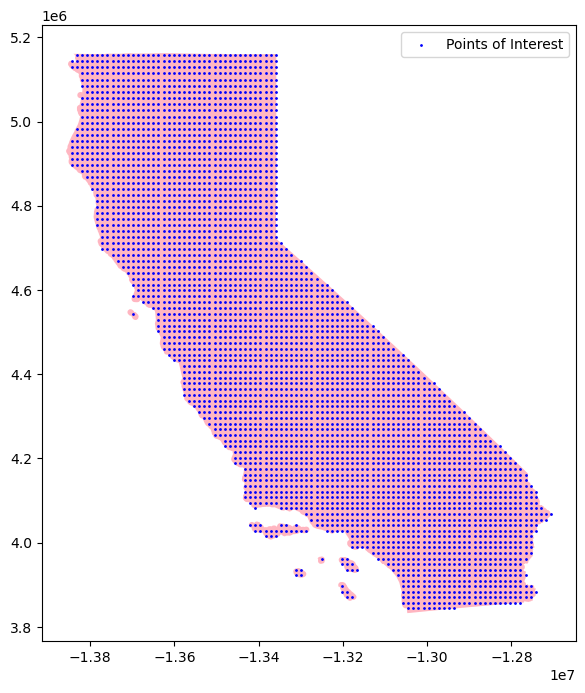

In [12]:
# Transform the coordinates
target_x, target_y = transformer.transform(inside_CA_LAT, inside_CA_LON)

fig, ax = plt.subplots(figsize=(10, 8))

# Plot the GeoDataFrame on the specified axis
gdf.plot(ax=ax,color='lightpink')

# Plot latitude and longitude points
plt.scatter(target_x, target_y, color='blue', label='Points of Interest',s=1)

# Show the plot
plt.legend()
plt.show()

# Add grid points to dataframe

In [13]:
data = pd.read_csv('US_solar_sites_2020_with_lat_lon_state_address.csv', index_col=False) 
data

,Latitude,Longitude,State,panel.area,power,panels,landscape.area,water,urban,Address
0,47.020475,-120.223217,WA,0.000141,NaN,1,0.000000,0,0,"2QCG+5P Renslow, WA, USA"
1,44.582129,-123.286963,OR,0.000141,NaN,1,0.000000,0,1,"3230 NW Garfield Ave, Corvallis, OR 97330, USA"
2,37.405176,-122.084769,CA,0.000141,NaN,1,0.000000,0,1,"1625 San Luis Ave, Mountain View, CA 94043, USA"
3,37.847173,-122.271529,CA,0.000141,NaN,1,0.000000,0,1,"3372 Martin Luther King Jr Way, Berkeley, CA 9..."
4,37.154450,-121.560230,CA,0.000141,NaN,1,0.000000,0,0,"16600 Finley Ridge Rd, Morgan Hill, CA 95037, USA"
...,...,...,...,...,...,...,...,...,...,...
3944,28.201082,-82.443652,FL,0.000022,NaN,5,0.000022,0,1,"22431 Eagles Watch Dr, Land O' Lakes, FL 34639..."
3945,28.094860,-80.646326,FL,0.003192,NaN,3,0.003192,0,1,"39V3+WF Melbourne, FL, USA"
3946,28.474708,-81.439484,FL,0.000526,NaN,2,0.000526,0,1,"5712 Ridge Club Loop, Orlando, FL 32839, USA"
3947,28.666004,-80.875553,FL,0.000053,NaN,3,0.000053,0,0,"35 Old Pennsylvania Ave, Mims, FL 32754, USA"


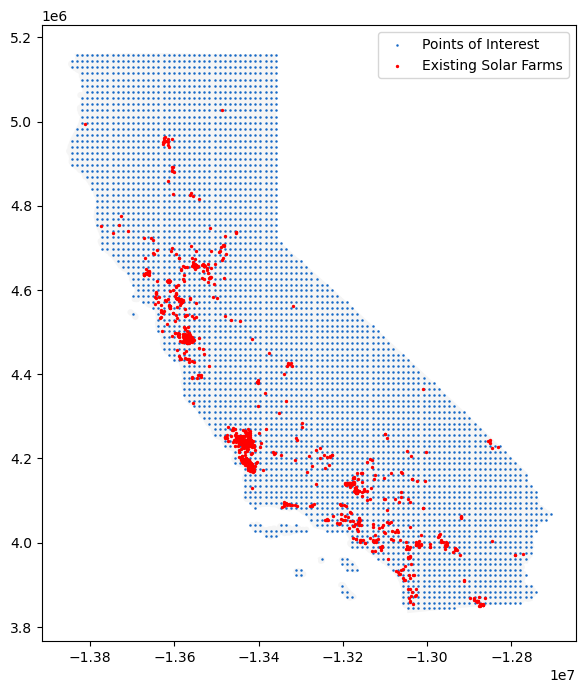

In [14]:
CA_data = data.copy()
CA_data = CA_data[CA_data['State']=='CA']

# Transform the coordinates
target_x, target_y = transformer.transform(inside_CA_LAT, inside_CA_LON)
solar_site_x, solar_site_y = transformer.transform(CA_data['Latitude'], CA_data['Longitude'])


fig, ax = plt.subplots(figsize=(10, 8))

# Plot the GeoDataFrame on the specified axis
gdf.plot(ax=ax,color='#F5F5F5')

# Plot latitude and longitude points
plt.scatter(target_x, target_y, color='#1569C7', label='Points of Interest',s=0.6)
plt.scatter(solar_site_x, solar_site_y, color='red', label='Existing Solar Farms',s=2)

# Show the plot
plt.legend()
plt.savefig('solar_sites_and_grid.pdf')
plt.show()

# Add points to dataset

In [15]:
new_row = pd.DataFrame({'Latitude': inside_CA_LAT, 'Longitude':inside_CA_LON, 'State':'CA' }) #, 'panel.area':, 'power':, 'panels':, '':, '':, '':, '':, '':, '': })

data = pd.concat([data.iloc[:],new_row]).reset_index(drop=True)
data

,Latitude,Longitude,State,panel.area,power,panels,landscape.area,water,urban,Address
0,47.020475,-120.223217,WA,0.000141,NaN,1.0,0.0,0.0,0.0,"2QCG+5P Renslow, WA, USA"
1,44.582129,-123.286963,OR,0.000141,NaN,1.0,0.0,0.0,1.0,"3230 NW Garfield Ave, Corvallis, OR 97330, USA"
2,37.405176,-122.084769,CA,0.000141,NaN,1.0,0.0,0.0,1.0,"1625 San Luis Ave, Mountain View, CA 94043, USA"
3,37.847173,-122.271529,CA,0.000141,NaN,1.0,0.0,0.0,1.0,"3372 Martin Luther King Jr Way, Berkeley, CA 9..."
4,37.154450,-121.560230,CA,0.000141,NaN,1.0,0.0,0.0,0.0,"16600 Finley Ridge Rd, Morgan Hill, CA 95037, USA"
...,...,...,...,...,...,...,...,...,...,...
7986,34.293795,-114.357804,CA,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7987,34.392355,-114.357804,CA,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7988,34.195234,-114.249069,CA,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7989,34.293795,-114.249069,CA,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Save data

In [16]:
data.to_csv("CA_Grid_dataframe_with_existing_solar_farms.csv",index=False)

In [ ]:
import matplotlib.pyplot as plt
import pyproj

In [15]:
from pyproj import Proj, Transformer

# Define the source and target EPSG codes
source_epsg = 'epsg:4326'  # WGS84
target_epsg = 'epsg:3857'  # Web Mercator

# Create Transformer
transformer = Transformer.from_crs(source_epsg, target_epsg)

# Example coordinates (longitude, latitude)
lon, lat = latitudes, longitudes

# Transform the coordinates
target_x, target_y = transformer.transform(lon, lat)

In [13]:
print(gdf.crs)

EPSG:3857


In [ ]:
from 4326 to 3857


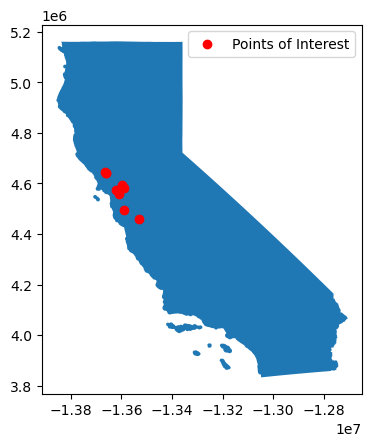

In [16]:
shapfile_path = 'CA_State_TIGER2016.shp'
gdf = gp.read_file(shapfile_path)

ax = gdf.plot()

# Sample latitude and longitude points (replace with your data)
latitudes = [37.4051763, 37.8471729, 37.1544497, 38.0069813, 38.0898882, 37.9737295,
 38.0862958, 38.4300017, 38.4591205, 38.436029 ]
longitudes = [-122.0847692, -122.2715295, -121.5602301, -122.086832,  -122.1426351,
 -122.3638504, -122.1396794, -122.7255246, -122.7449891, -122.7223877]

# Plot latitude and longitude points
ax.scatter(target_x, target_y, color='red', label='Points of Interest')

# Show the plot
plt.legend()
plt.show()

In [4]:
import geopandas as gp
from shapely.geometry import Point

metersteps=10
planningarea=gp.read_file('CA_State_TIGER2016.shp')

planningarea=planningarea.to_crs(epsg=32633) # you can leave this out or replace with any other
envelope=planningarea.geometry.envelope
envelopecoords=list(envelope.geometry.exterior[0].coords)

urtuple=envelopecoords[2]
lltuple=envelopecoords[0]


xur=urtuple[0]
yur=urtuple[1]
xll=lltuple[0]
yll=lltuple[1]

regularpoints = gp.GeoDataFrame(columns=['geometry'])

for i in range(round((xur-xll)/metersteps)):
    yll2=yll

    for i in range(round((yur-yll)/metersteps)):
        regularpoint=gp.GeoDataFrame([Point(xur,yll2)],columns=['geometry'])
        print(regularpoint)
        regularpoints=regularpoints.append(regularpoint)
        yll2=yll2+metersteps
        print(len(regularpoints))

    xur = xur - metersteps

regularpoints.to_file('regularpoints.shp', driver='Shapefile')

                            geometry
0  POINT (-2875635.999 14247360.311)


AttributeError: 'GeoDataFrame' object has no attribute 'append'